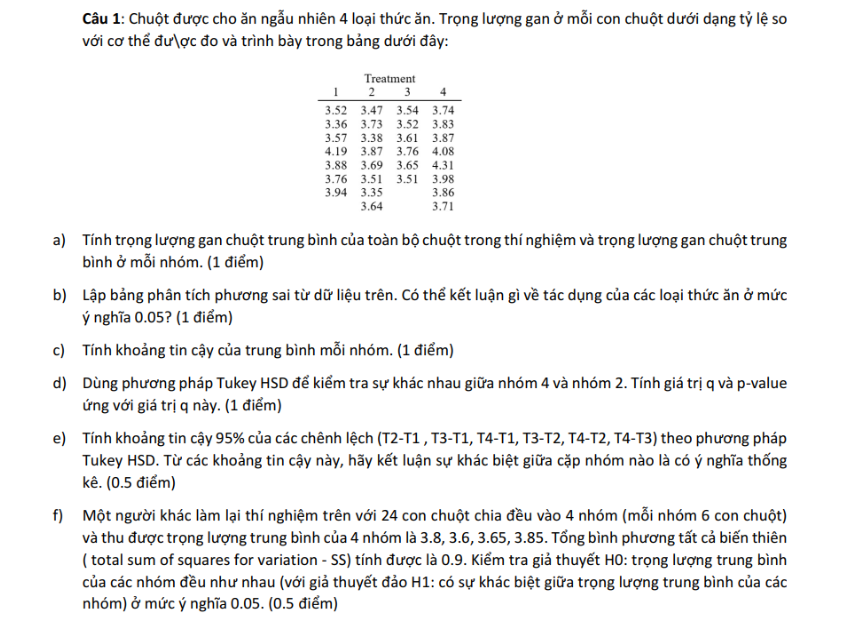

# Phạm Quốc Thắng - 23521431

# Mai Huy Khang - 23520692

### a)

In [30]:
group_data = {
    1: [3.52, 3.36, 3.57, 4.19, 3.88, 3.76, 3.94],
    2: [3.47, 3.73, 3.38, 3.87, 3.69, 3.51, 3.35, 3.64],
    3: [3.54, 3.52, 3.61, 3.76, 3.65, 3.51],
    4: [3.74, 3.83, 3.87, 4.08, 4.31, 3.98, 3.86, 3.71]
}

# Trung bình 
group_averages = {group: sum(data)/len(data) for group, data in group_data.items()}

# Gộp 
all_data = [value for data in group_data.values() for value in data]
overall_average = sum(all_data) / len(all_data)

# Kết quả
print("Trọng lượng gan chuột trung bình của toàn bộ:", round(overall_average, 2))
print("Trọng lượng gan chuột trung bình theo từng nhóm:")
for group, avg in group_averages.items():
    print(f" - Nhóm {group}: {round(avg, 2)}")

Trọng lượng gan chuột trung bình của toàn bộ: 3.72
Trọng lượng gan chuột trung bình theo từng nhóm:
 - Nhóm 1: 3.75
 - Nhóm 2: 3.58
 - Nhóm 3: 3.6
 - Nhóm 4: 3.92


### b)

In [31]:
from scipy.stats import f_oneway
import pandas as pd

# ANOVA 1D
anova_result = f_oneway(*group_data.values())

print("Kết quả ANOVA:")
print(f"F = {anova_result.statistic:.4f}")
print(f"p-value = {anova_result.pvalue:.4f}")

alpha = 0.05
if anova_result.pvalue < alpha:
    print("=> Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa các loại thức ăn (p < 0.05).")
else:
    print("=> Kết luận: Không có sự khác biệt có ý nghĩa thống kê giữa các loại thức ăn (p >= 0.05).")

Kết quả ANOVA:
F = 4.6581
p-value = 0.0102
=> Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa các loại thức ăn (p < 0.05).


### c)

In [32]:
import scipy.stats as stats
import numpy as np

alpha = 0.05  

print("Khoảng tin cậy 95% cho trung bình của từng nhóm:")

for name, values in group_data.items():
    n = len(values)
    mean = np.mean(values)
    std = np.std(values, ddof=1)
    t_crit = stats.t.ppf(1 - alpha/2, df=n - 1)
    margin = t_crit * (std / np.sqrt(n))
    ci_lower = mean - margin
    ci_upper = mean + margin
    
    print(f"{name}: ({ci_lower:.3f}, {ci_upper:.3f})")

Khoảng tin cậy 95% cho trung bình của từng nhóm:
1: (3.483, 4.008)
2: (3.428, 3.732)
3: (3.497, 3.699)
4: (3.758, 4.087)


### d)

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = []
for group, values in group_data.items():
    for v in values:
        data.append([v, group])
df = pd.DataFrame(data, columns=["Gan", "ThucAn"])

# Tukey HSD
tukey = pairwise_tukeyhsd(endog=df["Gan"], groups=df["ThucAn"], alpha=0.05)

print(tukey)

print("\nKết quả so sánh Thức ăn 4 và Thức ăn 2:")
for res in tukey._results_table.data[1:]:
    g1, g2 = res[0], res[1]
    if (g1 == "Thức ăn 2" and g2 == "Thức ăn 4") or (g1 == "Thức ăn 4" and g2 == "Thức ăn 2"):
        print(f"Hiệu số trung bình: {res[2]:.4f}")
        print(f"q (studentized range): {res[4]:.4f}")
        print(f"p-value: {res[5]:.4f}")
        print(f"Khoảng tin cậy 95%: ({res[3]:.4f}, {res[4]:.4f})")
        print("=> Có khác biệt có ý nghĩa thống kê." if res[6] else "=> Không có khác biệt có ý nghĩa thống kê.")

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.1657 0.4109 -0.4553 0.1239  False
     1      3  -0.1474   0.57 -0.4587 0.1639  False
     1      4   0.1768 0.3552 -0.1128 0.4664  False
     2      3   0.0183 0.9983 -0.2838 0.3205  False
     2      4   0.3425 0.0123  0.0627 0.6223   True
     3      4   0.3242 0.0322   0.022 0.6263   True
---------------------------------------------------

Kết quả so sánh Thức ăn 4 và Thức ăn 2:


### e)

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group_data = {
    "T1": [3.52, 3.36, 3.57, 4.19, 3.88, 3.76, 3.94],
    "T2": [3.47, 3.73, 3.38, 3.87, 3.69, 3.51, 3.35, 3.64],
    "T3": [3.54, 3.52, 3.61, 3.76, 3.65, 3.51],
    "T4": [3.74, 3.83, 3.87, 4.08, 4.31, 3.98, 3.86, 3.71]
}

data = []
for group, values in group_data.items():
    for v in values:
        data.append([v, group])
df = pd.DataFrame(data, columns=["Gan", "Group"])

# Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df["Gan"], groups=df["Group"], alpha=0.05)

print("Kết quả Tukey HSD cho các cặp nhóm:")
print(tukey_result)

target_pairs = [("T2", "T1"), ("T3", "T1"), ("T4", "T1"), ("T3", "T2"), ("T4", "T2"), ("T4", "T3")]

print("\nKhoảng tin cậy 95% và kết luận cho các cặp cụ thể:")
for res in tukey_result._results_table.data[1:]:
    g1, g2 = res[0], res[1]
    if (g1, g2) in target_pairs or (g2, g1) in target_pairs:
        print(f"{g1} - {g2}:")
        print(f"  Hiệu số trung bình     = {res[2]:.4f}")
        print(f"  Khoảng tin cậy 95%     = ({res[3]:.4f}, {res[4]:.4f})")
        print(f"  p-value                = {res[5]:.4f}")
        print("  => Khác biệt có ý nghĩa thống kê." if res[6] else "  => Không có khác biệt ý nghĩa thống kê.")

Kết quả Tukey HSD cho các cặp nhóm:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    T1     T2  -0.1657 0.4109 -0.4553 0.1239  False
    T1     T3  -0.1474   0.57 -0.4587 0.1639  False
    T1     T4   0.1768 0.3552 -0.1128 0.4664  False
    T2     T3   0.0183 0.9983 -0.2838 0.3205  False
    T2     T4   0.3425 0.0123  0.0627 0.6223   True
    T3     T4   0.3242 0.0322   0.022 0.6263   True
---------------------------------------------------

Khoảng tin cậy 95% và kết luận cho các cặp cụ thể:
T1 - T2:
  Hiệu số trung bình     = -0.1657
  Khoảng tin cậy 95%     = (0.4109, -0.4553)
  p-value                = 0.1239
  => Không có khác biệt ý nghĩa thống kê.
T1 - T3:
  Hiệu số trung bình     = -0.1474
  Khoảng tin cậy 95%     = (0.5700, -0.4587)
  p-value                = 0.1639
  => Không có khác biệt ý nghĩa thống kê.
T1 - T4:
  Hiệu số trung bình     = 0.1768
  Khoảng tin cậy 95

### f)

In [35]:
from scipy.stats import f

group_means = np.array([3.8, 3.6, 3.65, 3.85])
n_per_group = 6
N = n_per_group * len(group_means)
grand_mean = np.mean(group_means)
SST = 0.9

# SS giữa các nhóm
SS_between = n_per_group * sum((group_means - grand_mean)**2)
# SS trong nhóm
SS_within = SST - SS_between
# Bậc tự do
df_between = len(group_means) - 1
df_within = N - len(group_means)

# Mean Square
MS_between = SS_between / df_between
MS_within = SS_within / df_within

# F-statistic
F_stat = MS_between / MS_within

# p-value
p_value = 1 - f.cdf(F_stat, df_between, df_within)

print(f"SS_between: {SS_between:.4f}")
print(f"SS_within: {SS_within:.4f}")
print(f"F = {F_stat:.4f}")
print(f"p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("=> Bác bỏ H0: Có sự khác biệt ý nghĩa thống kê giữa các nhóm.")
else:
    print("=> Không bác bỏ H0: Không có sự khác biệt ý nghĩa thống kê giữa các nhóm.")

SS_between: 0.2550
SS_within: 0.6450
F = 2.6357
p-value = 0.0778
=> Không bác bỏ H0: Không có sự khác biệt ý nghĩa thống kê giữa các nhóm.
